In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df=df[['Annual Income (k$)','Spending Score (1-100)']]

In [10]:
df.shape

(200, 2)

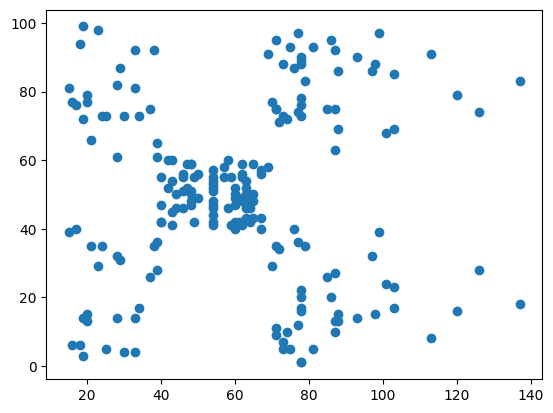

In [9]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.show()

In [19]:
# plotting elbow curve
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,20):
    km=KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)




In [20]:
wcss

[269981.28,
 183653.32894736843,
 157141.1315292319,
 73880.64496247194,
 66465.14810226465,
 38463.49408903117,
 30552.71402546729,
 25011.92025547377,
 23243.148074793426,
 22064.96460372658,
 19318.691178648492,
 17448.101424097724,
 15642.894474185236,
 14018.319594091547,
 12500.487423198463,
 12568.87780341004,
 10487.572419306902,
 9411.653632478632,
 9220.43194438412]

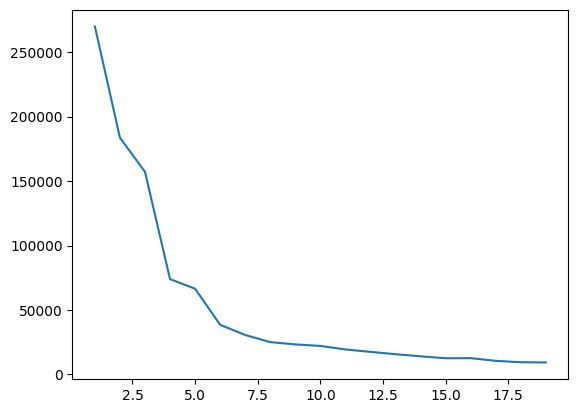

In [22]:
plt.plot(range(1,20),wcss)

elbow meathod givving cluster some where 8, due to  unsymetrical point 

In [36]:
km=KMeans(n_clusters=5)
y_means=km.fit_predict(df)

In [37]:
df.iloc[y_means==5,0]  # x_axis of those who y_mean is 5 

Series([], Name: Annual Income (k$), dtype: int64)

[]

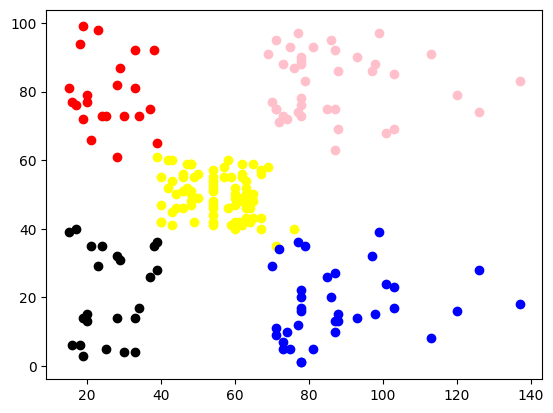

In [39]:
plt.scatter(df.iloc[y_means==0,0] ,df.iloc[y_means==0,1] ,color='red')
plt.scatter(df.iloc[y_means==1,0] ,df.iloc[y_means==1,1] ,color='yellow')
plt.scatter(df.iloc[y_means==2,0] ,df.iloc[y_means==2,1] ,color='blue')
plt.scatter(df.iloc[y_means==3,0] ,df.iloc[y_means==3,1] ,color='pink')
plt.scatter(df.iloc[y_means==4,0] ,df.iloc[y_means==4,1] ,color='black')


plt.plot()

In [42]:
!pip install plotly

In [45]:
import plotly.express as px
df=pd.read_csv('Mall_Customers.csv')
fig=px.scatter_3d(x=df["Age"],y=df["Annual Income (k$)"],z=df["Spending Score (1-100)"])
fig.show()


In [47]:
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

km=KMeans(n_clusters=5)
y_means=km.fit_predict(df)

In [54]:
df1=pd.DataFrame()
df1['col1']=df.iloc[:,0]
df1['col2']=df.iloc[:,1]
df1['col3']=df.iloc[:,2]
df1['label']=y_means



In [57]:
fig=px.scatter_3d(x=df1['col1'],y=df1['col2'],z=df1['col3'],color=df1['label'])
fig.show()